In [26]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
import seaborn as sns
import statsmodels.api as sm 
from statsmodels import regression
from scipy import stats
%matplotlib inline

yf.pdr_override()

start_i = '2017-01-01'

bova11 = yf.download('BOVA11.SA', start=start_i, parse_dates=True)
vale3 = yf.download('VALE3.SA', start=start_i, parse_dates=True)
b3sa3 = yf.download('B3SA3.SA', start=start_i, parse_dates=True)
itub4 = yf.download('ITUB4.SA', start=start_i, parse_dates=True)
petr4 = yf.download('PETR4.SA', start=start_i, parse_dates=True)
bbdc4 = yf.download('BBDC4.SA', start=start_i, parse_dates=True)
petr3 = yf.download('PETR3.SA', start=start_i, parse_dates=True)
abev3 = yf.download('ABEV3.SA', start=start_i, parse_dates=True)
mglu3 = yf.download('MGLU3.SA', start=start_i, parse_dates=True)
bbsa3 = yf.download('BBAS3.SA', start=start_i, parse_dates=True)
itsa4 = yf.download('ITSA4.SA', start=start_i, parse_dates=True)

tickers_dict =[bova11, vale3, b3sa3, itub4, petr4,
               bbdc4, petr3, abev3, mglu3, bbsa3, itsa4]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
bova11.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-15,97.699997,98.339996,96.930000,98.029999,98.029999,13982380
2020-07-16,97.550003,97.800003,96.459999,96.820000,96.820000,6110460
2020-07-17,97.419998,99.250000,97.419998,99.129997,99.129997,5621400
2020-07-20,99.120003,100.599998,98.879997,100.500000,100.500000,8563550
2020-07-21,101.230003,101.360001,99.849998,100.290001,100.290001,5261760
2020-07-22,100.570000,101.150002,99.389999,100.379997,100.379997,6524500
2020-07-23,100.379997,101.059998,98.269997,98.400002,98.400002,7849280
2020-07-24,98.300003,98.930000,97.089996,98.589996,98.589996,9457090
2020-07-27,98.930000,100.730003,98.849998,100.620003,100.620003,7329950


- iShares Ibovespa Fundo de Índice (BOVA11)

- (1) - VALE3 (10.26%)
- (2) - B3SA3 (7.11%)
- (3) - ITUB4 (6.67%)

- = 24.04 % (24/07/2020)



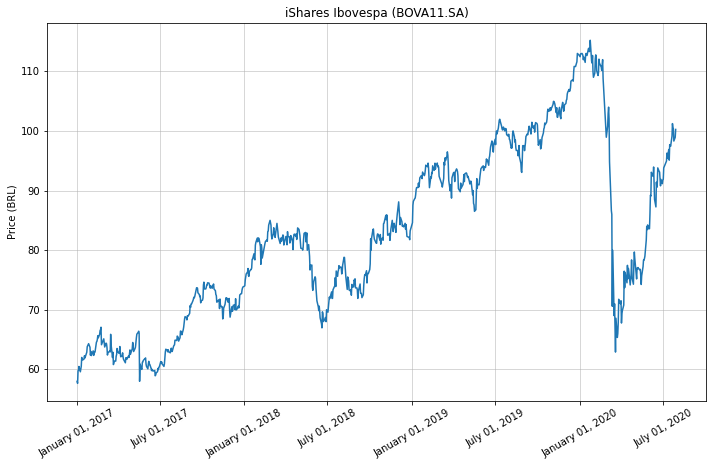

In [28]:
# Plotting iShares Ibovespa (BOVA11.SA): 

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open, linestyle='-')

plt.ylabel('Price (BRL)')
plt.title('iShares Ibovespa (BOVA11.SA)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

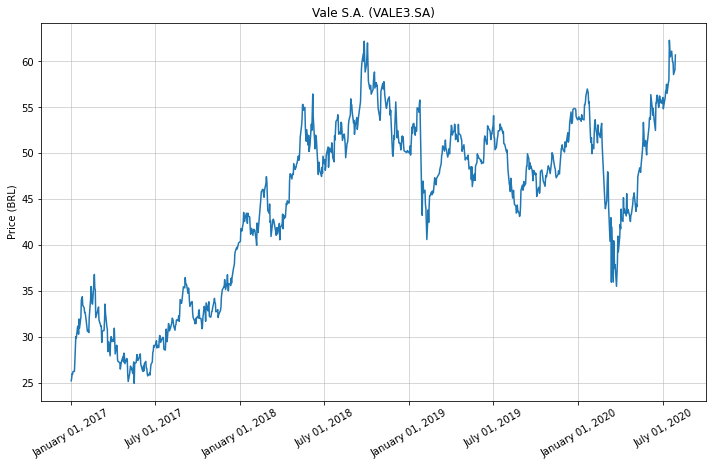

In [29]:
# Plotting Vale S.A. (VALE3.SA):

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(vale3.index, vale3.Open, linestyle='-')
plt.title('Vale S.A. (VALE3.SA)')
plt.ylabel('Price (BRL)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

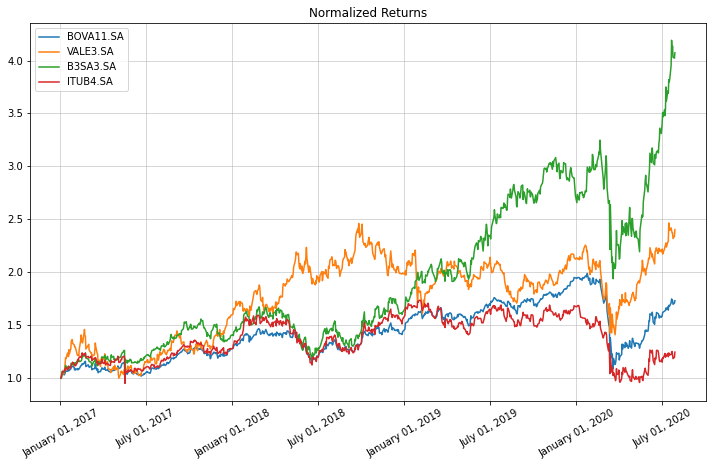

In [30]:
# Normalized comparison

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open/bova11.Open[0], label='BOVA11.SA', linestyle='-')
plt.plot(vale3.index, vale3.Open/vale3.Open[0], label='VALE3.SA', linestyle='-')
plt.plot(b3sa3.index, b3sa3.Open/b3sa3.Open[0], label='B3SA3.SA', linestyle='-')
plt.plot(itub4.index, itub4.Open/itub4.Open[0], label='ITUB4.SA', linestyle='-')

plt.title('Normalized Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

In [31]:
# Creating DataFrame with opening prices:

my_dict_2 = {'BOVA11': bova11['Adj Close'], 'VALE3': vale3['Adj Close'], 
             'B3SA3': b3sa3['Adj Close'], 'ITUB4': itub4['Adj Close'], 'PETR4': petr4['Adj Close'], 
             'BBDC4': bbdc4['Adj Close'], 'PETR3': petr4['Adj Close'], 'ABEV3': abev3['Adj Close'], 
             'MGLU3': mglu3['Adj Close'], 'BBSA3': bbsa3['Adj Close'], 'ITSA4': itsa4['Adj Close']}

df_main = pd.DataFrame(my_dict_2)

for key, item in df_main.items():
    r_col_name = str(key) + ('_PctChange')
    returns = item.pct_change()[1:]
    df_main[r_col_name] = returns

df_main.tail()

,BOVA11,VALE3,B3SA3,ITUB4,PETR4,BBDC4,PETR3,ABEV3,MGLU3,BBSA3,...,VALE3_PctChange,B3SA3_PctChange,ITUB4_PctChange,PETR4_PctChange,BBDC4_PctChange,PETR3_PctChange,ABEV3_PctChange,MGLU3_PctChange,BBSA3_PctChange,ITSA4_PctChange
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-22,100.379997,59.240002,66.699997,27.070000,23.049541,22.830000,23.049541,14.71,84.650002,35.200001,...,-0.007705,0.008619,-0.025558,-0.013693,-0.017219,-0.013693,0.002044,0.004152,-0.008171,0.000000
2020-07-23,98.400002,58.849998,65.519997,26.500000,22.570000,22.500000,22.570000,14.40,80.400002,34.349998,...,-0.006583,-0.017691,-0.021057,-0.020805,-0.014455,-0.020805,-0.021074,-0.050207,-0.024148,-0.014259
2020-07-24,98.589996,58.599998,65.349998,26.469999,22.730000,22.639999,22.730000,14.93,79.669998,33.950001,...,-0.004248,-0.002595,-0.001132,0.007089,0.006222,0.007089,0.036806,-0.009080,-0.011645,0.007715
2020-07-27,100.620003,61.369999,66.230003,27.799999,23.200001,23.680000,23.200001,15.28,79.349998,34.910000,...,0.047270,0.013466,0.050246,0.020678,0.045936,0.020678,0.023443,-0.004017,0.028277,0.054546
2020-07-28,100.290001,60.639999,64.650002,27.799999,22.959999,23.760000,22.959999,15.13,80.919998,35.529999,...,-0.011895,-0.023856,0.000000,-0.010345,0.003378,-0.010345,-0.009817,0.019786,0.017760,-0.008167


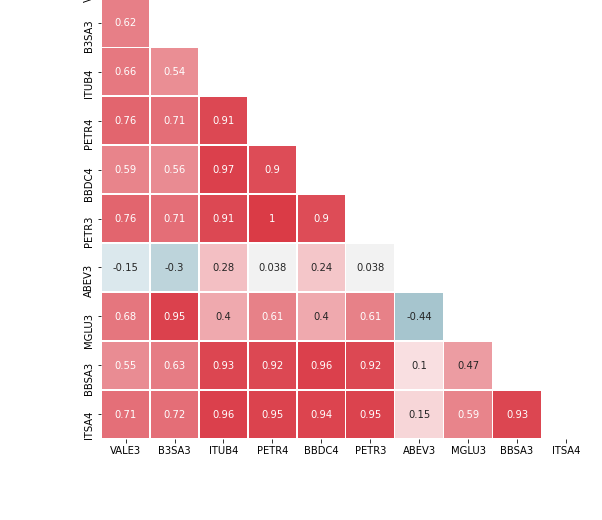

In [32]:
# Create correlation matrix: 

correl = df_main.iloc[:, 1:11].corr()

# Create Mask for upper triangle: 

mask = np.triu(np.ones_like(correl, dtype=np.bool))

# Set Matplotlib Figure: 

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap: 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask with the correct aspect ratio:

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True )

plt.show()

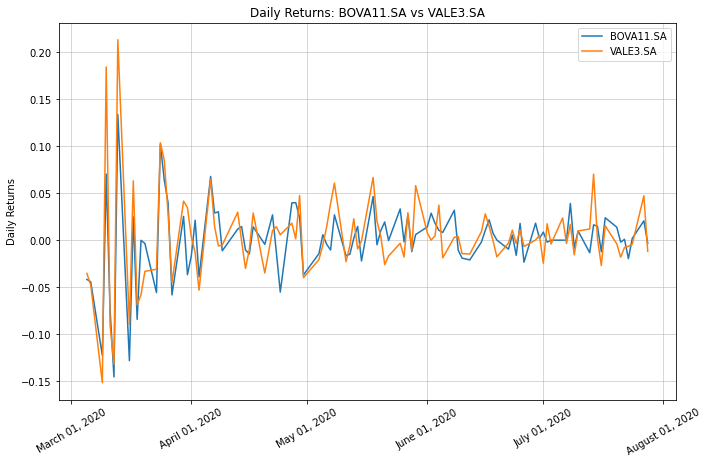

In [33]:
# BOVA11.SA vs VALE3.SA:

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

n_days = 100

plt.plot(df_main.index[-n_days:], df_main.BOVA11_PctChange[-n_days:], label='BOVA11.SA', linestyle='-')
plt.plot(df_main.index[-n_days:], df_main.VALE3_PctChange[-n_days:], label='VALE3.SA', linestyle='-')

plt.title('Daily Returns: BOVA11.SA vs VALE3.SA')
plt.ylabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

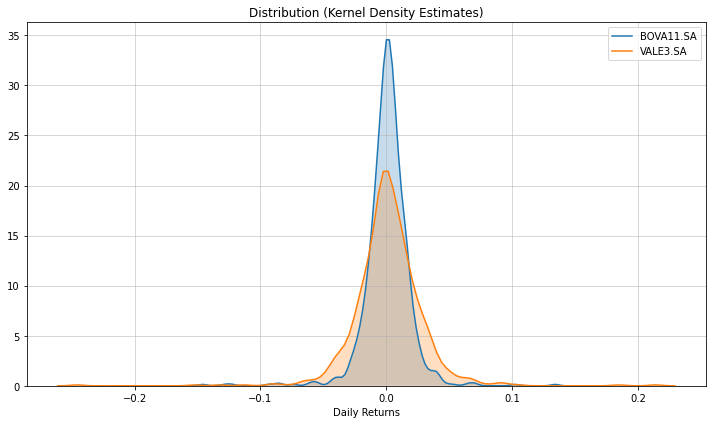

In [34]:
# Distributions:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_main.BOVA11_PctChange, label='BOVA11.SA' , shade=True, linestyle='-')
sns.kdeplot(data=df_main.VALE3_PctChange, label='VALE3.SA', shade=True, linestyle='-')

plt.title('Distribution (Kernel Density Estimates)')
plt.xlabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- Technical Indicator: Moving Average/Rolling Mean

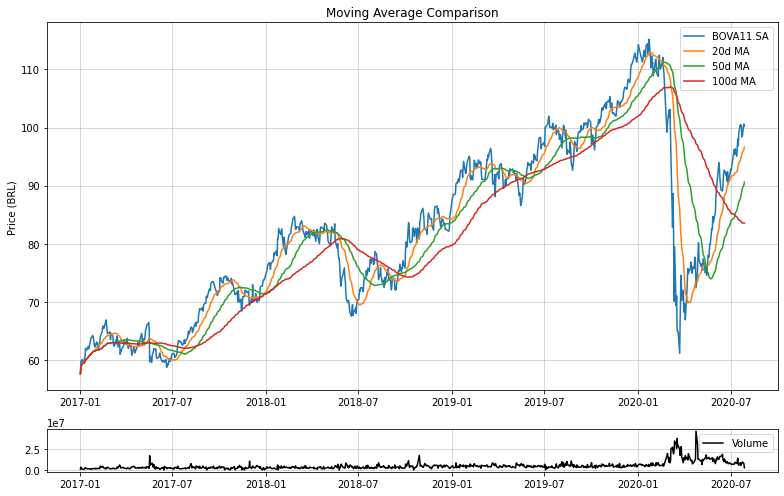

In [35]:
# Calculating 20, 50, 100 day moving average:

df_adj_close = {}

df_adj_close['20ma'] = bova11['Adj Close'].rolling(window=20, min_periods=0).mean()
df_adj_close['50ma'] = bova11['Adj Close'].rolling(window=50, min_periods=0).mean()
df_adj_close['100ma'] = bova11['Adj Close'].rolling(window=100, min_periods=0).mean()

plt.figure(figsize=(11, 7))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(bova11.index, bova11['Adj Close'], label='BOVA11.SA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['20ma'], label='20d MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['50ma'], label='50d MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['100ma'], label='100d MA', linestyle='-')

ax2.plot(bova11.index, bova11.Volume,color='k', label='Volume', linestyle='-')

ax1.set_ylabel('Price (BRL)')
ax1.set_title('Moving Average Comparison')

ax1.legend()
ax2.legend()

ax1.grid(linewidth=0.5)
ax2.grid(linewidth=0.5)

plt.tight_layout()
plt.show()


- Application: Machine Learning
- Can we find the best MA?
- Credits to G.Malato: ('https://github.com/gianlucamalato/machinelearning/blob/master/Find_the_best_moving_average.ipynb')

In [36]:
df_main.tail()

,BOVA11,VALE3,B3SA3,ITUB4,PETR4,BBDC4,PETR3,ABEV3,MGLU3,BBSA3,...,VALE3_PctChange,B3SA3_PctChange,ITUB4_PctChange,PETR4_PctChange,BBDC4_PctChange,PETR3_PctChange,ABEV3_PctChange,MGLU3_PctChange,BBSA3_PctChange,ITSA4_PctChange
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-22,100.379997,59.240002,66.699997,27.070000,23.049541,22.830000,23.049541,14.71,84.650002,35.200001,...,-0.007705,0.008619,-0.025558,-0.013693,-0.017219,-0.013693,0.002044,0.004152,-0.008171,0.000000
2020-07-23,98.400002,58.849998,65.519997,26.500000,22.570000,22.500000,22.570000,14.40,80.400002,34.349998,...,-0.006583,-0.017691,-0.021057,-0.020805,-0.014455,-0.020805,-0.021074,-0.050207,-0.024148,-0.014259
2020-07-24,98.589996,58.599998,65.349998,26.469999,22.730000,22.639999,22.730000,14.93,79.669998,33.950001,...,-0.004248,-0.002595,-0.001132,0.007089,0.006222,0.007089,0.036806,-0.009080,-0.011645,0.007715
2020-07-27,100.620003,61.369999,66.230003,27.799999,23.200001,23.680000,23.200001,15.28,79.349998,34.910000,...,0.047270,0.013466,0.050246,0.020678,0.045936,0.020678,0.023443,-0.004017,0.028277,0.054546
2020-07-28,100.290001,60.639999,64.650002,27.799999,22.959999,23.760000,22.959999,15.13,80.919998,35.529999,...,-0.011895,-0.023856,0.000000,-0.010345,0.003378,-0.010345,-0.009817,0.019786,0.017760,-0.008167


In [37]:
# iShares Ibovespa (BOVA11.SA): Positive Daily Returns: 

pos_mask_main = df_main.BOVA11_PctChange > 0
pos_masked_main_df = df_main[pos_mask_main]

pos_masked_main_df_count = len(pos_masked_main_df)
bova11_count = len(df_main.BOVA11_PctChange[1:])

pos_bova11_prop = pos_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 > 0): {:.6f} \tCount: {}'.format(pos_bova11_prop, pos_masked_main_df_count))

# iShares Ibovespa (BOVA11.SA): Negative Daily Returns:

neg_mask_main = df_main.BOVA11_PctChange < 0
neg_masked_main_df = df_main[neg_mask_main]

neg_masked_main_df_count = len(neg_masked_main_df)

neg_bova11_prop = neg_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 < 0): {:.6f} \tCount: {}'.format(neg_bova11_prop, neg_masked_main_df_count))

# iShares Ibovespa (BOVA11.SA): Zero change Daily Returns:

null_mask_main = df_main.BOVA11_PctChange == 0
null_masked_main_df = df_main[null_mask_main]

null_masked_main_df_count = len(null_masked_main_df)

null_bova11_prop = null_masked_main_df_count/bova11_count
print('\n(Daily Returns | BOVA11 = 0): {:.6f} \tCount: {}'.format(null_bova11_prop, null_masked_main_df_count))



(Daily Returns | BOVA11 > 0): 0.533183 	Count: 474

(Daily Returns | BOVA11 < 0): 0.444319 	Count: 395

(Daily Returns | BOVA11 = 0): 0.022497 	Count: 20


In [41]:
# Calculating Proportion of Positive Daily Returns for all assets | BOVA11 > 0

pct_columns = df_main.columns[-10:].tolist()
ticker_columns = df_main.columns[1:11].tolist()

list_c = []

for col in pct_columns:
    mask = (df_main[col] > df_main.BOVA11_PctChange) & (df_main.BOVA11_PctChange > 0)
    masked_df = df_main[mask]
    masked_df_count = len(masked_df)
    list_c.append(masked_df_count)

array_c = np.array(list_c)
array_c = array_c / pos_masked_main_df_count
list_c = array_c.tolist()

my_dict_A = dict(zip(ticker_columns, list_c))

my_dict_A = {k: v for k, v in sorted(my_dict_A.items(), key=lambda item: item[1], reverse=True)}

i = 0

print('\nRanking of stocks given POSITIVE benchmark returns:')

for k, v in my_dict_A.items():
    i += 1
    print('\n{}. {}: {:.4f}'.format(i, k, v))

# Calculating Proportion of Negative Daily Returns for all assets | BOVA11 > 0

list_d = []

for col in pct_columns:
    mask = (df_main[col] > df_main.BOVA11_PctChange) & (df_main.BOVA11_PctChange > 0)
    masked_df = df_main[mask]
    masked_df_count = len(masked_df)
    list_d.append(masked_df_count)

array_d = np.array(list_d)
array_d = array_d / neg_masked_main_df_count
list_d = array_d.tolist()

my_dict_B = dict(zip(ticker_columns, list_d))

my_dict_B = {k: v for k, v in sorted(my_dict_B.items(), key=lambda item: item[1], reverse=True)}    


Ranking of stocks given POSITIVE benchmark returns:

1. PETR4: 0.5823

2. PETR3: 0.5823

3. BBDC4: 0.5802

4. B3SA3: 0.5654

5. BBSA3: 0.5422

6. MGLU3: 0.5232

7. ITSA4: 0.5211

8. ITUB4: 0.5000

9. VALE3: 0.4768

10. ABEV3: 0.3249


In [40]:
# Calculating Proportion of Negative Daily Returns for all assets | BOVA11 > 0:

print('\nRanking of stocks given NEGATIVE benchmark returns:')

i = 0
for k, v in my_dict_B.items():
    i += 1
    print('\n{}. {}: {:.4f}'.format(i, k, v))


Ranking of stocks given NEGATIVE benchmark returns:

1. PETR4: 0.6987

2. PETR3: 0.6987

3. BBDC4: 0.6962

4. B3SA3: 0.6785

5. BBSA3: 0.6506

6. MGLU3: 0.6278

7. ITSA4: 0.6253

8. ITUB4: 0.6000

9. VALE3: 0.5722

10. ABEV3: 0.3899


In [ ]:
# 